In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [38]:
places = pd.read_csv('data/county_data.csv', dtype={'CountyFIPS': str})
print(f"\nShape: {places.shape}")
print("\nFirst 5 rows:")
print(places.head())

print("\n\nAll column names:")
print(places.columns.tolist())

print(places['MeasureId'].value_counts())


Shape: (240886, 22)

First 5 rows:
   Year StateAbbr StateDesc LocationName DataSource         Category  \
0  2022        AL   Alabama         Clay      BRFSS  Health Outcomes   
1  2022        AL   Alabama         Dale      BRFSS  Health Outcomes   
2  2022        AL   Alabama      Jackson      BRFSS  Health Outcomes   
3  2022        AL   Alabama   Lauderdale      BRFSS  Health Outcomes   
4  2022        AL   Alabama     Lawrence      BRFSS       Disability   

                       Measure Data_Value_Unit          Data_Value_Type  \
0  Current asthma among adults               %         Crude prevalence   
1       Arthritis among adults               %         Crude prevalence   
2          Stroke among adults               %         Crude prevalence   
3         Obesity among adults               %  Age-adjusted prevalence   
4  Any disability among adults               %         Crude prevalence   

   Data_Value  ... Low_Confidence_Limit High_Confidence_Limit  \
0        11.0  

In [39]:
places_columns = {
    'fips': 'LocationID',           # County FIPS code
    'state': 'StateDesc',            # State name
    'county': 'LocationName',        # County name
    'measure': 'MeasureId',          # Health measure identifier
    'value': 'Data_Value'            # The actual data value
}

places_measures = [
    'ACCESS2',    # Access to healthcare (PRIMARY - must use this one!)
    'CHECKUP',    # Annual checkup (optional)
]

print("PLACES data column mappings saved")
print(f"  FIPS column: {places_columns['fips']}")
print(f"  State column: {places_columns['state']}")
print(f"  County column: {places_columns['county']}")
print(f"  Using health measures: {places_measures}")

PLACES data column mappings saved
  FIPS column: LocationID
  State column: StateDesc
  County column: LocationName
  Using health measures: ['ACCESS2', 'CHECKUP']


In [40]:
hp = pd.read_csv('data/ahrf2024hp.csv')  # Health Professionals
pop = pd.read_csv('data/ahrf2024pop.csv')  # Population
geo = pd.read_csv('data/ahrf2024geo_Feb2025.csv')  # Geography/FIPS

print("HEALTH PROFESSIONALS DATA:")
print(hp.shape)
print(hp.columns.tolist())
print(hp.head())

print("\n\nPOPULATION DATA:")
print(pop.shape)
print(pop.columns.tolist())
print(pop.head())

print("\n\nGEOGRAPHY DATA:")
print(geo.shape)
print(geo.columns.tolist())
print(geo.head())

HEALTH PROFESSIONALS DATA:
(3240, 1880)
['fips_st_cnty', 'cnty_name_st_abbrev', 'phys_nf_prim_care_pc_exc_rsdt_22', 'phys_nf_prim_care_pc_exc_rsdt_21', 'phys_nf_prim_care_pc_rsdnt_22', 'phys_nf_prim_care_pc_rsdnt_21', 'md_nf_prim_care_pc_excl_rsdnt_22', 'md_nf_prim_care_pc_excl_rsdnt_21', 'md_nf_prim_care_pc_rsdnt_22', 'md_nf_prim_care_pc_rsdnt_21', 'do_nf_prim_care_pc_excl_rsdnt_22', 'do_nf_prim_care_pc_excl_rsdnt_21', 'do_nf_prim_care_pc_rsdnt_22', 'do_nf_prim_care_pc_rsdnt_21', 'md_nf_fed_activ_22', 'md_nf_fed_activ_21', 'md_nf_activ_22', 'md_nf_activ_21', 'md_nf_fed_22', 'md_nf_fed_21', 'md_nf_22', 'md_nf_21', 'md_nf_all_pc_22', 'md_nf_all_pc_21', 'md_nf_pc_ofc_22', 'md_nf_pc_ofc_21', 'md_nf_pc_hosp_all_22', 'md_nf_pc_hosp_all_21', 'md_nf_pc_rsdnt_22', 'md_nf_pc_rsdnt_21', 'md_nf_pc_hosp_ft_22', 'md_nf_pc_hosp_ft_21', 'md_nf_othprofl_22', 'md_nf_othprofl_21', 'md_nf_admin_22', 'md_nf_admin_21', 'md_nf_teach_22', 'md_nf_teach_21', 'md_nf_resrch_22', 'md_nf_resrch_21', 'md_nf_oth_22'

In [41]:
ahrf_columns = {
    'fips': 'fips_st_cnty',                          # FIPS code
    'county_name': 'cnty_name_st_abbrev',            # County name
    'pcp_count_2022': 'phys_nf_prim_care_pc_exc_rsdt_22',  # PRIMARY CARE PHYSICIANS 2022
    'pcp_count_2021': 'phys_nf_prim_care_pc_exc_rsdt_21'   # (backup if needed)
}

population_columns = {
    'fips': 'fips_st_cnty',                          # FIPS code  
    'population_2022': 'popn_22',                     # POPULATION 2022
    'population_2021': 'popn_21'                      # (backup if needed)
}

print(f"  FIPS: {ahrf_columns['fips']}")
print(f"  Primary Care Physicians: {ahrf_columns['pcp_count_2022']}")
print(f"  Population: {population_columns['population_2022']}")

  FIPS: fips_st_cnty
  Primary Care Physicians: phys_nf_prim_care_pc_exc_rsdt_22
  Population: popn_22


In [42]:
print("="*60)
print("STEP 3: EXPLORE COUNTY HEALTH RANKINGS DATA")
print("="*60)

# Load CHR data
chr = pd.read_csv('data/economic_data.csv')

print(f"\nShape: {chr.shape}")
print("\nFirst 5 rows:")
print(chr.head())

print("\n\nAll column names:")
for i, col in enumerate(chr.columns, 1):
    print(f"{i}. {col}")

# Look for FIPS
print("\n\nLooking for FIPS column...")
fips_cols = [col for col in chr.columns if 'fips' in col.lower()]
print(f"Found: {fips_cols}")

# Look for income
print("\n\nLooking for INCOME columns...")
income_cols = [col for col in chr.columns if 'income' in col.lower()]
print(f"Found: {income_cols}")

# Look for poverty
print("\n\nLooking for POVERTY columns...")
poverty_cols = [col for col in chr.columns if 'poverty' in col.lower()]
print(f"Found: {poverty_cols}")

# Look for uninsured
print("\n\nLooking for UNINSURED columns...")
uninsured_cols = [col for col in chr.columns if 'uninsured' in col.lower()]
print(f"Found: {uninsured_cols}")

STEP 3: EXPLORE COUNTY HEALTH RANKINGS DATA

Shape: (79961, 5)

First 5 rows:
   FIPS_Code Stabr      Area_Name        Attribute       Value
0          0    US  United States      POVALL_2023  40763043.0
1          0    US  United States   CI90LBALL_2023  40485829.0
2          0    US  United States   CI90UBALL_2023  41040257.0
3          0    US  United States   PCTPOVALL_2023        12.5
4          0    US  United States  CI90LBALLP_2023        12.4


All column names:
1. FIPS_Code
2. Stabr
3. Area_Name
4. Attribute
5. Value


Looking for FIPS column...
Found: ['FIPS_Code']


Looking for INCOME columns...
Found: []


Looking for POVERTY columns...
Found: []


Looking for UNINSURED columns...
Found: []


In [43]:
print("\n\nAttribute counts:")
print(chr['Attribute'].value_counts())

print("\n\nIncome-related attributes:")
income_attrs = chr[chr['Attribute'].str.contains('income|INCOME', case=False, na=False)]['Attribute'].unique()
print(income_attrs)

print("\n\nPoverty-related attributes:")
pov_attrs = chr[chr['Attribute'].str.contains('pov|POV', case=False, na=False)]['Attribute'].unique()
print(pov_attrs)

print("\n\nUninsured-related attributes:")
unins_attrs = chr[chr['Attribute'].str.contains('uninsured|UNINSURED|insurance|INSURANCE', case=False, na=False)]['Attribute'].unique()
print(unins_attrs)



Attribute counts:
Attribute
POVALL_2023                        3195
CI90LBALL_2023                     3195
CI90UBALL_2023                     3195
PCTPOVALL_2023                     3195
CI90LBALLP_2023                    3195
CI90UBALLP_2023                    3195
POV017_2023                        3195
CI90LB017_2023                     3195
CI90UB017_2023                     3195
PCTPOV017_2023                     3195
CI90LB017P_2023                    3195
CI90UB017P_2023                    3195
POV517_2023                        3195
CI90LB517_2023                     3195
CI90UB517_2023                     3195
PCTPOV517_2023                     3195
CI90LB517P_2023                    3195
CI90UB517P_2023                    3195
MEDHHINC_2023                      3195
CI90LBINC_2023                     3195
CI90UBINC_2023                     3195
Urban_Influence_Code_2024          3144
Rural_Urban_Continuum_Code_2023    3144
Rural_Urban_Continuum_Code_2013    3133
Urban_Infl

In [44]:
chr_columns = {
    'fips': 'FIPS_Code',
    'state': 'Stabr',
    'county_name': 'Area_Name',
    'attribute': 'Attribute',
    'value': 'Value'
}

chr_attributes = {
    'MEDHHINC_2023': 'MedianIncome',  # Median household income
    'PCTPOVALL_2023': 'PovertyRate',  # Poverty rate (% of all people)
    'Rural_Urban_Continuum_Code_2023': 'RuralUrbanCode'  # Rural-urban code
}

print(f"  FIPS: {chr_columns['fips']}")
print(f"  Attributes to use: {list(chr_attributes.keys())}")

  FIPS: FIPS_Code
  Attributes to use: ['MEDHHINC_2023', 'PCTPOVALL_2023', 'Rural_Urban_Continuum_Code_2023']


In [45]:
"""
COMPLETE COLUMN MAPPINGS & DATA MERGING
Healthcare Access Analysis - All Three Datasets
"""

import pandas as pd
import numpy as np

print("COLUMN MAPPINGS FOR DATASETS")

# 1. CDC PLACES DATA

places_columns = {
    'fips': 'LocationID',           # County FIPS code
    'state': 'StateDesc',            # State name
    'county': 'LocationName',        # County name
    'measure': 'MeasureId',          # Health measure identifier
    'value': 'Data_Value'            # The actual data value
}

places_measures = [
    'ACCESS2',    # Access to healthcare (PRIMARY)
    'CHECKUP'     # Annual checkup
]

print("\n CDC PLACES Mappings:")
print(f"  FIPS: {places_columns['fips']}")
print(f"  Measures: {places_measures}")

# 2. HRSA AHRF DATA (Health Professionals + Population)

ahrf_hp_columns = {
    'fips': 'fips_st_cnty',
    'county_name': 'cnty_name_st_abbrev',
    'pcp_count': 'phys_nf_prim_care_pc_exc_rsdt_22'  # Primary care physicians 2022
}

ahrf_pop_columns = {
    'fips': 'fips_st_cnty',
    'population': 'popn_22'  # Population 2022
}

print("\n HRSA AHRF Mappings:")
print(f"  FIPS: {ahrf_hp_columns['fips']}")
print(f"  PCP Count: {ahrf_hp_columns['pcp_count']}")
print(f"  Population: {ahrf_pop_columns['population']}")

# 3. COUNTY HEALTH RANKINGS DATA

chr_columns = {
    'fips': 'FIPS_Code',
    'state': 'Stabr',
    'county_name': 'Area_Name',
    'attribute': 'Attribute',
    'value': 'Value'
}

chr_attributes = {
    'MEDHHINC_2023': 'MedianIncome',           # Median household income
    'PCTPOVALL_2023': 'PovertyRate',           # Poverty rate %
    'Rural_Urban_Continuum_Code_2023': 'RuralUrbanCode'  # Rural-urban classification
}

print("\nCounty Health Rankings Mappings:")
print(f"  FIPS: {chr_columns['fips']}")
print(f"  Attributes: {list(chr_attributes.keys())}")

print("\nStep 1: Loading datasets...")

# Load PLACES
places = pd.read_csv('data/county_data.csv')
print(f"PLACES: {places.shape}")

# Load AHRF (both files)
ahrf_hp = pd.read_csv('data/ahrf2024hp.csv')
ahrf_pop = pd.read_csv('data/ahrf2024pop.csv')
print(f"AHRF Health Professionals: {ahrf_hp.shape}")
print(f"AHRF Population: {ahrf_pop.shape}")

# Load CHR
chr = pd.read_csv('data/economic_data.csv')
print(f"County Health Rankings: {chr.shape}")

print("\nStep 2: PLACES data")

# Standardize FIPS (add leading zeros)
places['FIPS'] = places['LocationID'].astype(str).str.zfill(5)

places_filtered = places[places['MeasureId'].isin(places_measures)].copy()

# Pivot to wide format (one row per county)
places_pivot = places_filtered.pivot_table(
    index='FIPS',
    columns='MeasureId',
    values='Data_Value',
    aggfunc='first'
).reset_index()

# Add state and county names
location_info = places[['LocationID', 'StateDesc', 'LocationName']].drop_duplicates()
location_info['FIPS'] = location_info['LocationID'].astype(str).str.zfill(5)
places_clean = places_pivot.merge(location_info[['FIPS', 'StateDesc', 'LocationName']], 
                                   on='FIPS', how='left')

print(f"Processed {len(places_clean)} counties")
print(f"Columns: {places_clean.columns.tolist()}")

print("\nStep 3: AHRF data")

# Clean FIPS codes
ahrf_hp['FIPS'] = ahrf_hp['fips_st_cnty'].astype(str).str.zfill(5)
ahrf_pop['FIPS'] = ahrf_pop['fips_st_cnty'].astype(str).str.zfill(5)

# Select needed columns from health professionals
ahrf_hp_clean = ahrf_hp[['FIPS', 'phys_nf_prim_care_pc_exc_rsdt_22']].copy()
ahrf_hp_clean = ahrf_hp_clean.rename(columns={
    'phys_nf_prim_care_pc_exc_rsdt_22': 'PCP_count'
})

ahrf_pop_clean = ahrf_pop[['FIPS', 'popn_22']].copy()
ahrf_pop_clean = ahrf_pop_clean.rename(columns={
    'popn_22': 'Population'
})

# Merge AHRF files together
ahrf_merged = ahrf_hp_clean.merge(ahrf_pop_clean, on='FIPS', how='outer')

print(f"Merged AHRF data: {len(ahrf_merged)} counties")
print(f"Columns: {ahrf_merged.columns.tolist()}")

print("\nStep 4: County Health Rankings")

chr['FIPS'] = chr['FIPS_Code'].astype(str).str.zfill(5)

chr_filtered = chr[chr['Attribute'].isin(CHR_ATTRIBUTES.keys())].copy()

chr_pivot = chr_filtered.pivot_table(
    index='FIPS',
    columns='Attribute',
    values='Value',
    aggfunc='first'
).reset_index()

# Rename columns to meaningful names
rename_dict = {attr: name for attr, name in CHR_ATTRIBUTES.items()}
chr_clean = chr_pivot.rename(columns=rename_dict)

print(f"Processed {len(chr_clean)} counties")
print(f"Columns: {chr_clean.columns.tolist()}")

print("\nStep 5: Merging all datasets by FIPS code")

df = places_clean.copy()
print(f"  Starting with PLACES: {len(df)} counties")

# Merge AHRF
df = df.merge(ahrf_merged, on='FIPS', how='left', suffixes=('', '_ahrf'))
print(f"  After merging AHRF: {len(df)} counties")

# Merge CHR
df = df.merge(chr_clean, on='FIPS', how='left', suffixes=('', '_chr'))
print(f"  After merging CHR: {len(df)} counties")

print(f"Final merged dataset: {df.shape}")

print("\nStep 6: Derived metrics")

# Provider per 100k population
if 'PCP_count' in df.columns and 'Population' in df.columns:
    df['PCP_per_100k'] = (df['PCP_count'] / df['Population']) * 100000
    df['PCP_per_100k'] = df['PCP_per_100k'].clip(upper=300)
    print(f"PCP_per_100k calculated")
    print(f"Mean: {df['PCP_per_100k'].mean():.1f}")
    print(f"Median: {df['PCP_per_100k'].median():.1f}")

# Shortage indicator
if 'PCP_per_100k' in df.columns:
    df['is_shortage'] = df['PCP_per_100k'] < 60
    print(f"Shortage indicator: {df['is_shortage'].sum()} counties below threshold")

# Low population indicator (proxy for rural)
if 'Population' in df.columns:
    df['is_low_population'] = df['Population'] < 50000
    print(f"Low population counties: {df['is_low_population'].sum()}")

df['access_score'] = 0
components = 0

if 'PCP_per_100k' in df.columns:
    df['pcp_quintile'] = pd.qcut(df['PCP_per_100k'].fillna(0), 
                                  q=5, labels=[1,2,3,4,5], duplicates='drop')
    df['access_score'] += df['pcp_quintile'].astype(float)
    components += 1

if 'ACCESS2' in df.columns:
    # ACCESS2 is % lacking access - lower is better, so invert
    df['access2_quintile'] = pd.qcut(df['ACCESS2'].fillna(100), 
                                      q=5, labels=[5,4,3,2,1], duplicates='drop')
    df['access_score'] += df['access2_quintile'].astype(float)
    components += 1

if components > 0:
    df['access_score'] = df['access_score'] / components
    print(f"Access score calculated (mean: {df['access_score'].mean():.2f})")

if 'access_score' in df.columns:
    df['is_healthcare_desert'] = df['access_score'] <= 2
    print(f"Healthcare deserts: {df['is_healthcare_desert'].sum()} counties")

print("\nStep 7: Data quality check...")

print("\nMissing values in key columns:")
key_cols = ['FIPS', 'StateDesc', 'LocationName', 'PCP_count', 'Population', 
            'PCP_per_100k', 'MedianIncome', 'PovertyRate', 'ACCESS2']
for col in key_cols:
    if col in df.columns:
        missing = df[col].isnull().sum()
        pct = (missing / len(df)) * 100
        print(f"  {col}: {missing} ({pct:.1f}%)")

print("\nStep 8: Saving merged dataset...")

df.to_csv('data/merged_healthcare_data.csv', index=False)
print(f"Saved to: data/merged_healthcare_data.csv")

print(f"\nFinal dataset shape: {df.shape}")
print(f"Counties included: {len(df):,}")
print(f"Variables available: {df.shape[1]}")

print("\nKey variables created:")
print("  - PCP_per_100k: Primary care providers per 100,000 population")
print("  - is_shortage: Boolean for counties below HRSA threshold (60 PCP/100k)")
print("  - is_healthcare_desert: Boolean for severely limited access")
print("  - access_score: Composite score (1-5, higher = better)")
print("  - is_low_population: Boolean for counties < 50,000 population")

print("\nFirst few rows:")
print(df[['FIPS', 'StateDesc', 'LocationName', 'PCP_per_100k', 
          'Population', 'PovertyRate', 'access_score']].head(10))


COLUMN MAPPINGS FOR DATASETS

 CDC PLACES Mappings:
  FIPS: LocationID
  Measures: ['ACCESS2', 'CHECKUP']

 HRSA AHRF Mappings:
  FIPS: fips_st_cnty
  PCP Count: phys_nf_prim_care_pc_exc_rsdt_22
  Population: popn_22

County Health Rankings Mappings:
  FIPS: FIPS_Code
  Attributes: ['MEDHHINC_2023', 'PCTPOVALL_2023', 'Rural_Urban_Continuum_Code_2023']

Step 1: Loading datasets...
PLACES: (240886, 22)
AHRF Health Professionals: (3240, 1880)
AHRF Population: (3240, 1469)
County Health Rankings: (79961, 5)

Step 2: PLACES data
Processed 3145 counties
Columns: ['FIPS', 'ACCESS2', 'CHECKUP', 'StateDesc', 'LocationName']

Step 3: AHRF data
Merged AHRF data: 3240 counties
Columns: ['FIPS', 'PCP_count', 'Population']

Step 4: County Health Rankings
Processed 3196 counties
Columns: ['FIPS', 'MedianIncome', 'PovertyRate', 'RuralUrbanCode']

Step 5: Merging all datasets by FIPS code
  Starting with PLACES: 3145 counties
  After merging AHRF: 3145 counties
  After merging CHR: 3145 counties
Final 

HEALTHCARE ACCESS ANALYSIS
Merged Dataset: 3,145 counties, 17 variables
RESEARCH QUESTION 1: Regional Provider Shortages
Top 10 States with Highest Shortage Rates:
             Avg_PCP  Shortage_Counties  Total_Counties  Pct_Shortage
StateDesc                                                            
Oklahoma       35.34                 69              77          89.6
Tennessee      40.30                 82              95          86.3
Mississippi    38.16                 70              82          85.4
Georgia        40.89                130             159          81.8
Kentucky       39.64                 97             120          80.8
Alabama        43.66                 54              67          80.6
Illinois       44.39                 82             102          80.4
Indiana        46.79                 73              92          79.3
Texas          38.16                200             254          78.7
Louisiana      43.57                 49              64          7

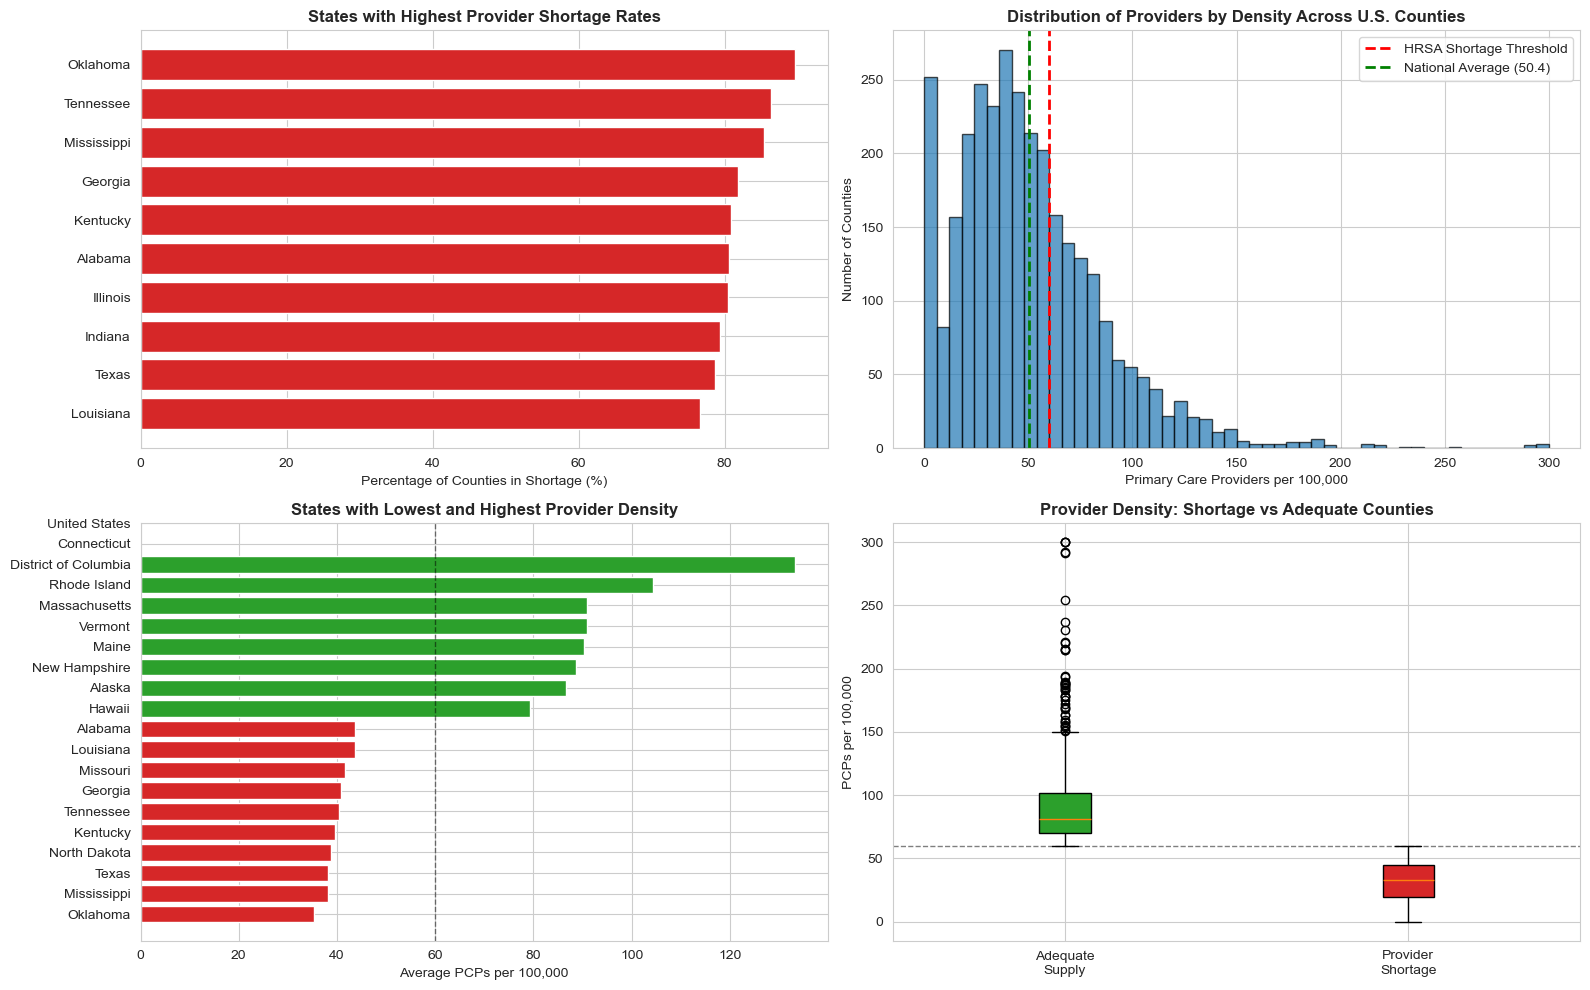

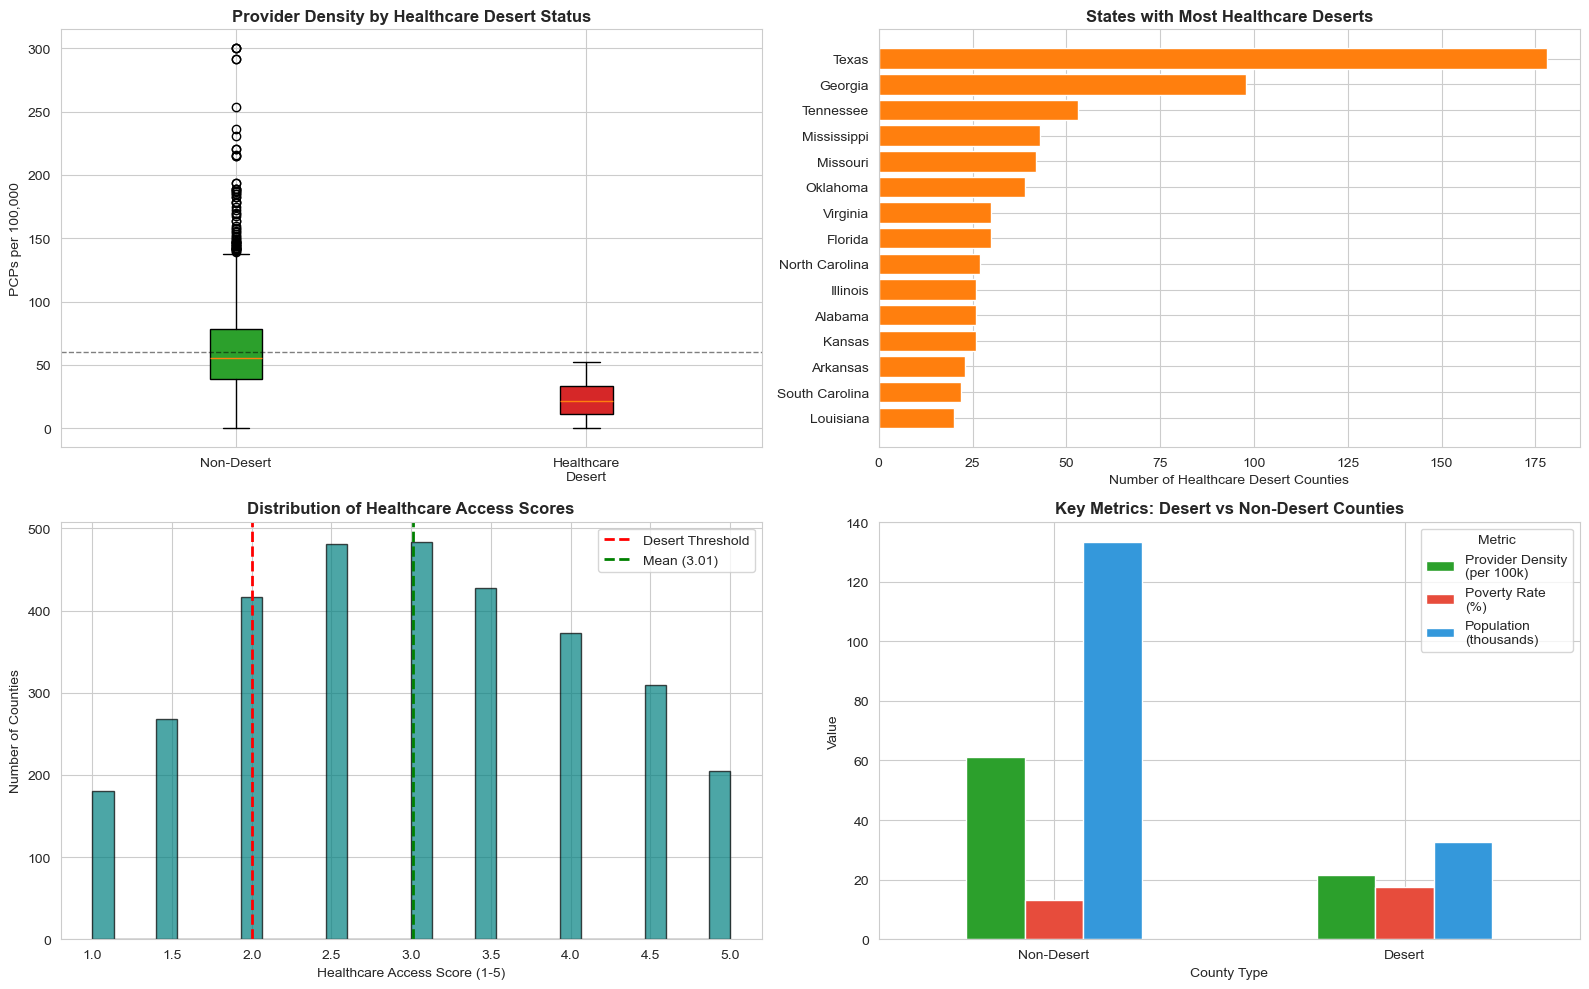

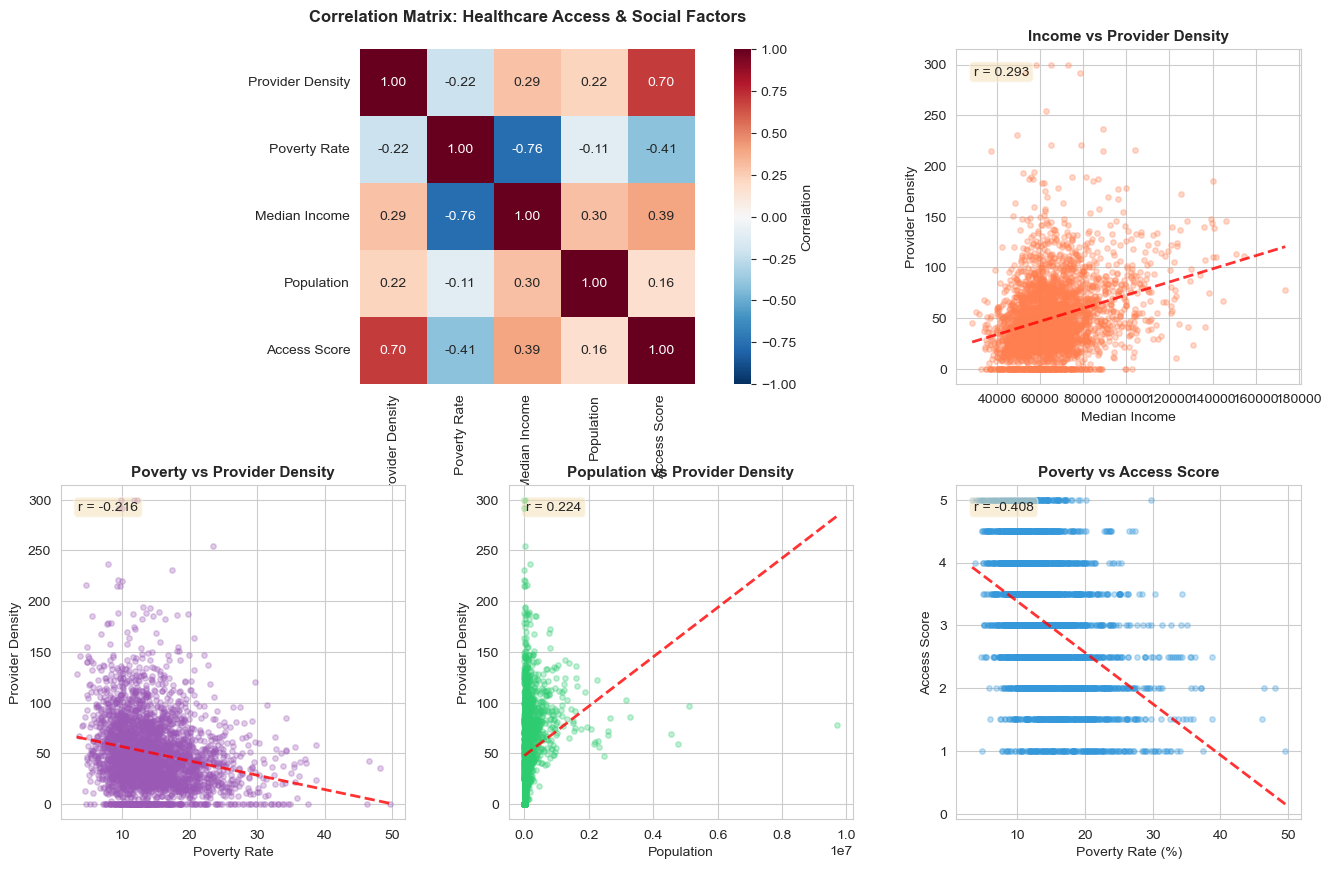

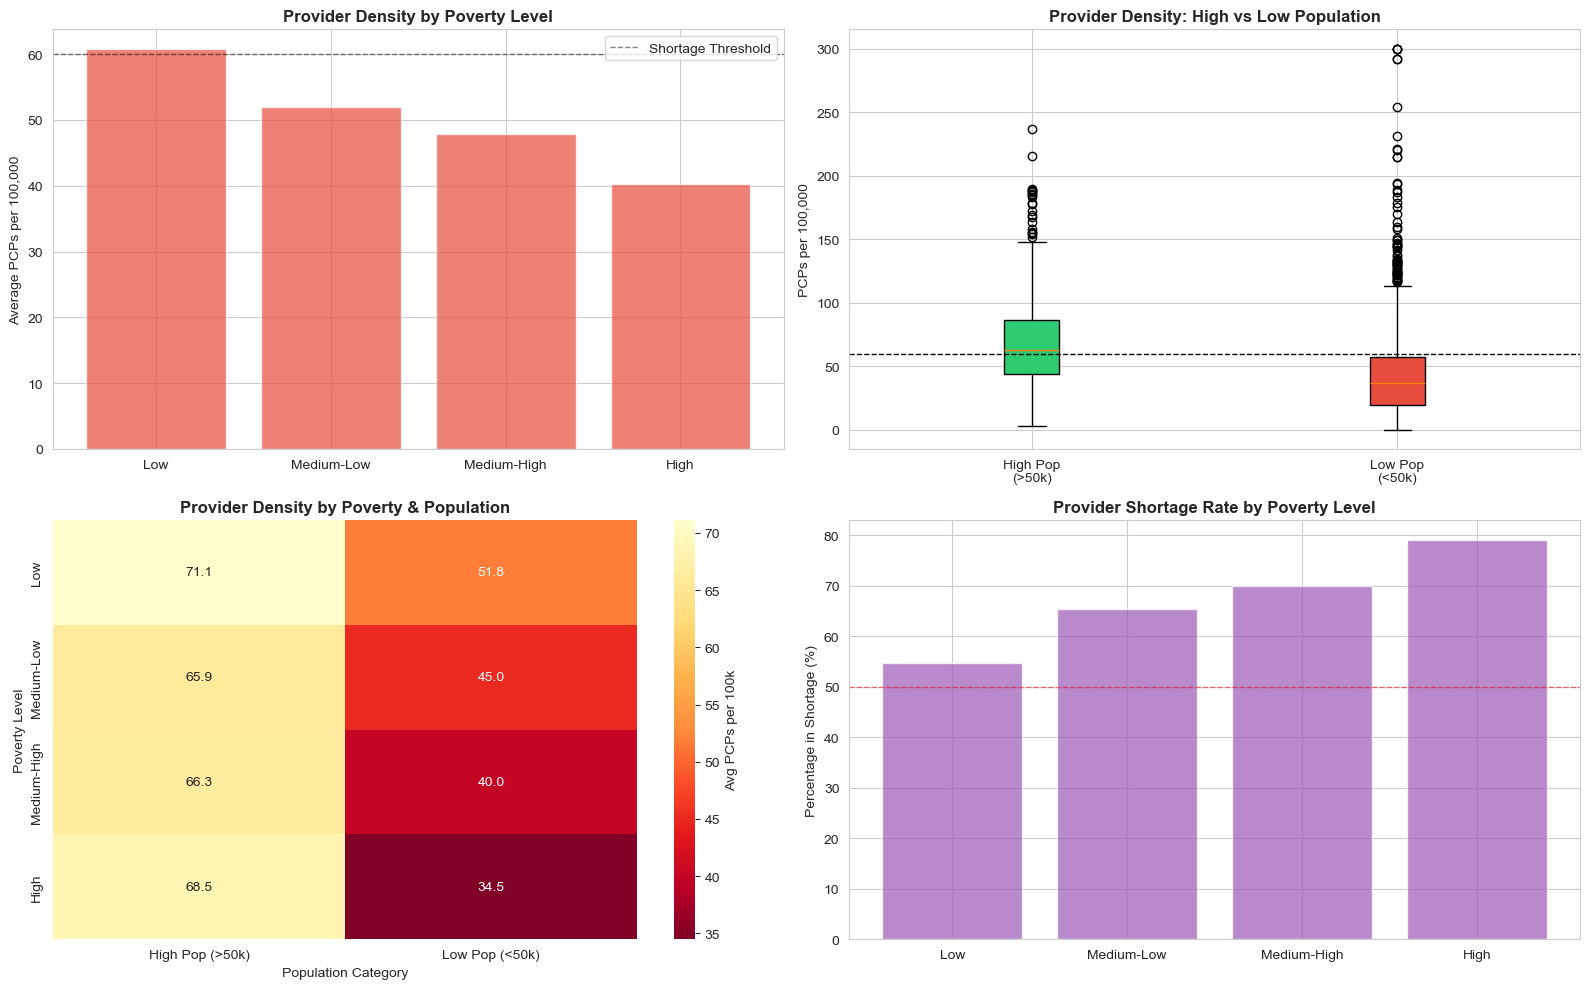

In [48]:
"""
Healthcare Provider Shortages and Access Inequities Analysis
Complete Analysis - 4 Research Questions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

import os
os.makedirs('output', exist_ok=True)

print("HEALTHCARE ACCESS ANALYSIS")

df = pd.read_csv('data/merged_healthcare_data.csv')
print(f"Merged Dataset: {df.shape[0]:,} counties, {df.shape[1]} variables")

# Research Question 1: Regional Provider Shortages

def research_question_1(df):
    """
    Q1: Which regions in the U.S. face the greatest provider shortages?
    """
    print("RESEARCH QUESTION 1: Regional Provider Shortages")
    
    if 'PCP_per_100k' not in df.columns or 'StateDesc' not in df.columns:
        print("Required data not available")
        return None
    
    # State-level summary
    state_summary = df.groupby('StateDesc').agg({
        'PCP_per_100k': ['mean', 'median', 'std', 'min', 'max'],
        'is_shortage': 'sum',
        'FIPS': 'count'
    }).round(2)
    
    state_summary.columns = ['Avg_PCP', 'Median_PCP', 'StdDev', 'Min_PCP', 'Max_PCP', 
                             'Shortage_Counties', 'Total_Counties']
    
    state_summary['Pct_Shortage'] = (state_summary['Shortage_Counties'] / 
                                     state_summary['Total_Counties'] * 100).round(1)
    
    state_summary = state_summary.sort_values('Pct_Shortage', ascending=False)
    
    print("Top 10 States with Highest Shortage Rates:")
    print(state_summary.head(10)[['Avg_PCP', 'Shortage_Counties', 'Total_Counties', 'Pct_Shortage']])
    print()
    
    print("Bottom 10 States with Lowest Shortage Rates:")
    print(state_summary.tail(10)[['Avg_PCP', 'Shortage_Counties', 'Total_Counties', 'Pct_Shortage']])
    print()
    
    # National statistics
    print("National Statistics:")
    print(f"  Total counties: {len(df):,}")
    print(f"  Counties in shortage: {df['is_shortage'].sum():,} ({df['is_shortage'].mean()*100:.1f}%)")
    print(f"  Average PCP per 100k: {df['PCP_per_100k'].mean():.1f}")
    print(f"  Median PCP per 100k: {df['PCP_per_100k'].median():.1f}")
    print()
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Top shortage states
    top10 = state_summary.head(10)
    axes[0,0].barh(range(len(top10)), top10['Pct_Shortage'], color='#d62728')
    axes[0,0].set_yticks(range(len(top10)))
    axes[0,0].set_yticklabels(top10.index)
    axes[0,0].set_xlabel('Percentage of Counties in Shortage (%)')
    axes[0,0].set_title('States with Highest Provider Shortage Rates', fontweight='bold', fontsize=12)
    axes[0,0].invert_yaxis()
    
    # Distribution of provider ratios
    axes[0,1].hist(df['PCP_per_100k'].dropna(), bins=50, color='#1f77b4', edgecolor='black', alpha=0.7)
    axes[0,1].axvline(60, color='red', linestyle='--', linewidth=2, label='HRSA Shortage Threshold')
    axes[0,1].axvline(df['PCP_per_100k'].mean(), color='green', linestyle='--', linewidth=2, 
                     label=f"National Average ({df['PCP_per_100k'].mean():.1f})")
    axes[0,1].set_xlabel('Primary Care Providers per 100,000')
    axes[0,1].set_ylabel('Number of Counties')
    axes[0,1].set_title('Distribution of Providers by Density Across U.S. Counties', fontweight='bold', fontsize=12)
    axes[0,1].legend()
    
    # State averages (top 10 and bottom 10)
    state_avg = df.groupby('StateDesc')['PCP_per_100k'].mean().sort_values()
    combined = pd.concat([state_avg.head(10), state_avg.tail(10)])
    colors = ['#d62728' if x < 60 else '#2ca02c' for x in combined.values]
    axes[1,0].barh(range(len(combined)), combined.values, color=colors)
    axes[1,0].set_yticks(range(len(combined)))
    axes[1,0].set_yticklabels(combined.index)
    axes[1,0].axvline(60, color='black', linestyle='--', linewidth=1, alpha=0.5)
    axes[1,0].set_xlabel('Average PCPs per 100,000')
    axes[1,0].set_title('States with Lowest and Highest Provider Density', fontweight='bold', fontsize=12)
    
    # Shortage vs adequate comparison
    bp = axes[1,1].boxplot([
        df[df['is_shortage']==False]['PCP_per_100k'].dropna(),
        df[df['is_shortage']==True]['PCP_per_100k'].dropna()
    ], labels=['Adequate\nSupply', 'Provider\nShortage'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#2ca02c')
    bp['boxes'][1].set_facecolor('#d62728')
    axes[1,1].set_ylabel('PCPs per 100,000')
    axes[1,1].set_title('Provider Density: Shortage vs Adequate Counties', fontweight='bold', fontsize=12)
    axes[1,1].axhline(60, color='black', linestyle='--', linewidth=1, alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('output/q1_regional_shortages.png', dpi=300, bbox_inches='tight')
    print("Visuals: output/q1_regional_shortages.png\n")
    
    return state_summary

# Research Question 2: Healthcare Desert Identification

def research_question_2(df):
    """
    Q2: Which counties are healthcare deserts with limited access?
    """
    print("RESEARCH QUESTION 2: Healthcare Desert Identification")

    if 'is_healthcare_desert' not in df.columns:
        print("Healthcare desert classification not available")
        return None
    
    deserts = df[df['is_healthcare_desert'] == True].copy()
    non_deserts = df[df['is_healthcare_desert'] == False].copy()
    
    print(f"Healthcare Desert Counties: {len(deserts):,} ({len(deserts)/len(df)*100:.1f}%)")
    print(f"Non-Desert Counties: {len(non_deserts):,} ({len(non_deserts)/len(df)*100:.1f}%)")
    print()
    
    # Comparison
    print("Comparison (Desert vs Non-Desert):")
    print(f"{'Metric':<30} {'Desert':>15} {'Non-Desert':>15} {'Difference':>15}")
    print("-" * 77)
    
    metrics = {
        'Avg PCP per 100k': ('PCP_per_100k', 'mean'),
        'Avg Population': ('Population', 'mean'),
        'Avg Poverty Rate (%)': ('PovertyRate', 'mean'),
        'Avg Median Income ($)': ('MedianIncome', 'mean'),
        '% Low Population': ('is_low_population', lambda x: x.sum()/len(x)*100)
    }
    
    for metric_name, (col, agg_func) in metrics.items():
        if col in df.columns:
            if callable(agg_func):
                desert_val = agg_func(deserts[col])
                nondesert_val = agg_func(non_deserts[col])
            else:
                desert_val = deserts[col].agg(agg_func)
                nondesert_val = non_deserts[col].agg(agg_func)
            
            diff = desert_val - nondesert_val
            print(f"{metric_name:<30} {desert_val:>15.1f} {nondesert_val:>15.1f} {diff:>15.1f}")
    
    print()
    
    # Most underserved counties
    if 'access_score' in deserts.columns:
        worst = deserts.nsmallest(20, 'access_score')[
            ['StateDesc', 'LocationName', 'PCP_per_100k', 'access_score', 'Population']
        ]
        print("Top 20 Most Underserved Counties:")
        print(worst.to_string(index=False))
        print()
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Provider density comparison
    bp1 = axes[0,0].boxplot([
        non_deserts['PCP_per_100k'].dropna(),
        deserts['PCP_per_100k'].dropna()
    ], labels=['Non-Desert', 'Healthcare\nDesert'], patch_artist=True)
    bp1['boxes'][0].set_facecolor('#2ca02c')
    bp1['boxes'][1].set_facecolor('#d62728')
    axes[0,0].set_ylabel('PCPs per 100,000')
    axes[0,0].set_title('Provider Density by Healthcare Desert Status', fontweight='bold', fontsize=12)
    axes[0,0].axhline(60, color='black', linestyle='--', linewidth=1, alpha=0.5)
    
    # Geographic distribution
    desert_by_state = df.groupby('StateDesc')['is_healthcare_desert'].sum().sort_values(ascending=False).head(15)
    axes[0,1].barh(range(len(desert_by_state)), desert_by_state.values, color='#ff7f0e')
    axes[0,1].set_yticks(range(len(desert_by_state)))
    axes[0,1].set_yticklabels(desert_by_state.index)
    axes[0,1].set_xlabel('Number of Healthcare Desert Counties')
    axes[0,1].set_title('States with Most Healthcare Deserts', fontweight='bold', fontsize=12)
    axes[0,1].invert_yaxis()
    
    # Access score distribution
    axes[1,0].hist(df['access_score'].dropna(), bins=30, color='teal', edgecolor='black', alpha=0.7)
    axes[1,0].axvline(2, color='red', linestyle='--', linewidth=2, label='Desert Threshold')
    axes[1,0].axvline(df['access_score'].mean(), color='green', linestyle='--', linewidth=2, 
                     label=f"Mean ({df['access_score'].mean():.2f})")
    axes[1,0].set_xlabel('Healthcare Access Score (1-5)')
    axes[1,0].set_ylabel('Number of Counties')
    axes[1,0].set_title('Distribution of Healthcare Access Scores', fontweight='bold', fontsize=12)
    axes[1,0].legend()
    
    # Multiple metrics comparison
    if all(col in df.columns for col in ['PCP_per_100k', 'PovertyRate', 'Population']):
        # Normalize metrics for comparison
        comparison_data = pd.DataFrame({
            'Provider Density': [non_deserts['PCP_per_100k'].mean(), deserts['PCP_per_100k'].mean()],
            'Poverty Rate': [non_deserts['PovertyRate'].mean(), deserts['PovertyRate'].mean()],
            'Population': [non_deserts['Population'].mean()/1000, deserts['Population'].mean()/1000]
        }, index=['Non-Desert', 'Desert'])
        
        comparison_data.plot(kind='bar', ax=axes[1,1], color=['#2ca02c', '#e74c3c', '#3498db'])
        axes[1,1].set_title('Key Metrics: Desert vs Non-Desert Counties', fontweight='bold', fontsize=12)
        axes[1,1].set_ylabel('Value')
        axes[1,1].set_xlabel('County Type')
        axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)
        axes[1,1].legend(title='Metric', labels=['Provider Density\n(per 100k)', 'Poverty Rate\n(%)', 'Population\n(thousands)'])
    
    plt.tight_layout()
    plt.savefig('output/q2_healthcare_deserts.png', dpi=300, bbox_inches='tight')
    print("Visuals: output/q2_healthcare_deserts.png\n")
    
    return deserts

# Research Question 3: Socioeconomic Correlations

def research_question_3(df):
    """
    Q3: How do shortages correlate with socioeconomic factors?
    """
    print("RESEARCH QUESTION 3: Socioeconomic Correlations")
    
    # Select variables for correlation
    var_mapping = {
        'PCP_per_100k': 'Provider Density',
        'PovertyRate': 'Poverty Rate',
        'MedianIncome': 'Median Income',
        'Population': 'Population',
        'access_score': 'Access Score'
    }
    
    available_vars = [v for v in var_mapping.keys() if v in df.columns and df[v].notna().sum() > 100]
    
    if len(available_vars) < 2:
        print("Insufficient data for correlation analysis")
        return None
    
    # Calculate correlation matrix
    corr_df = df[available_vars].copy()
    corr_matrix = corr_df.corr()
    
    print("Correlation Matrix:")
    print(corr_matrix.round(3))
    print()
    
    # Key findings
    print("Key Correlation Findings:")
    if 'PCP_per_100k' in corr_matrix.columns:
        pcp_corrs = corr_matrix['PCP_per_100k'].drop('PCP_per_100k').sort_values(key=abs, ascending=False)
        for var, corr_val in pcp_corrs.items():
            strength = 'strong' if abs(corr_val) > 0.5 else 'moderate' if abs(corr_val) > 0.3 else 'weak'
            direction = 'positive' if corr_val > 0 else 'negative'
            print(f"  Provider Density ↔ {var_mapping[var]}: r = {corr_val:.3f} ({strength} {direction})")
    print()
    
    # Visualization
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    # Correlation heatmap
    ax1 = fig.add_subplot(gs[0, :2])
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True,
                fmt='.2f', cbar_kws={'label': 'Correlation'},
                xticklabels=[var_mapping.get(v, v) for v in corr_matrix.columns],
                yticklabels=[var_mapping.get(v, v) for v in corr_matrix.columns],
                ax=ax1, vmin=-1, vmax=1)
    ax1.set_title('Correlation Matrix: Healthcare Access & Social Factors', fontweight='bold', pad=20, fontsize=12)
    
    # Scatter plots for key relationships
    scatter_configs = [
        ('MedianIncome', 'PCP_per_100k', 'Income vs Provider Density', 'coral', (0, 2)),
        ('PovertyRate', 'PCP_per_100k', 'Poverty vs Provider Density', '#9b59b6', (1, 0)),
        ('Population', 'PCP_per_100k', 'Population vs Provider Density', '#2ecc71', (1, 1))
    ]
    
    for x_var, y_var, title, color, pos in scatter_configs:
        if x_var in df.columns and y_var in df.columns:
            ax = fig.add_subplot(gs[pos[0], pos[1]])
            valid_data = df[[x_var, y_var]].dropna()
            
            if len(valid_data) > 10:
                ax.scatter(valid_data[x_var], valid_data[y_var], alpha=0.3, s=15, color=color)
                ax.set_xlabel(var_mapping.get(x_var, x_var))
                ax.set_ylabel(var_mapping.get(y_var, y_var))
                ax.set_title(title, fontweight='bold', fontsize=11)
                
                # Trend line
                z = np.polyfit(valid_data[x_var], valid_data[y_var], 1)
                p = np.poly1d(z)
                ax.plot(valid_data[x_var].sort_values(),
                       p(valid_data[x_var].sort_values()),
                       "r--", linewidth=2, alpha=0.8)
                
                # Correlation coefficient
                corr_val = valid_data[x_var].corr(valid_data[y_var])
                ax.text(0.05, 0.95, f'r = {corr_val:.3f}', transform=ax.transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Access score vs poverty
    if 'PovertyRate' in df.columns and 'access_score' in df.columns:
        ax = fig.add_subplot(gs[1, 2])
        valid_data = df[['PovertyRate', 'access_score']].dropna()
        if len(valid_data) > 10:
            ax.scatter(valid_data['PovertyRate'], valid_data['access_score'], alpha=0.3, s=15, color='#3498db')
            ax.set_xlabel('Poverty Rate (%)')
            ax.set_ylabel('Access Score')
            ax.set_title('Poverty vs Access Score', fontweight='bold', fontsize=11)
            
            z = np.polyfit(valid_data['PovertyRate'], valid_data['access_score'], 1)
            p = np.poly1d(z)
            ax.plot(valid_data['PovertyRate'].sort_values(),
                   p(valid_data['PovertyRate'].sort_values()),
                   "r--", linewidth=2, alpha=0.8)
            
            corr_val = valid_data['PovertyRate'].corr(valid_data['access_score'])
            ax.text(0.05, 0.95, f'r = {corr_val:.3f}', transform=ax.transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.savefig('output/q3_socioeconomic_correlations.png', dpi=300, bbox_inches='tight')
    print("Visuals: output/q3_socioeconomic_correlations.png\n")
    
    return corr_matrix

# Research Question 4: Social Determinants Deep Dive

def research_question_4(df):
    """
    Q4: Deep dive into poverty, population size, and demographics
    """
    print("RESEARCH QUESTION 4: Social Determinants Deep Dive")
    
    results = {}
    
    # Poverty level analysis
    if 'PovertyRate' in df.columns and 'PCP_per_100k' in df.columns:
        print("Analysis by Poverty Level:")
        df['poverty_quartile'] = pd.qcut(df['PovertyRate'].fillna(df['PovertyRate'].median()), 
                                         q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'],
                                         duplicates='drop')
        
        poverty_analysis = df.groupby('poverty_quartile', observed=True).agg({
            'PCP_per_100k': ['mean', 'median', 'std'],
            'is_shortage': 'sum',
            'FIPS': 'count'
        }).round(2)
        
        poverty_analysis.columns = ['Avg_PCP', 'Median_PCP', 'StdDev', 'Shortage_Count', 'Total_Counties']
        poverty_analysis['Shortage_Pct'] = (poverty_analysis['Shortage_Count'] / 
                                           poverty_analysis['Total_Counties'] * 100).round(1)
        
        print(poverty_analysis)
        print()
        results['poverty_analysis'] = poverty_analysis
    
    # Population size analysis
    if 'is_low_population' in df.columns and 'PCP_per_100k' in df.columns:
        print("Population Size Comparison:")
        pop_comparison = df.groupby('is_low_population').agg({
            'PCP_per_100k': ['mean', 'median'],
            'PovertyRate': 'mean' if 'PovertyRate' in df.columns else lambda x: np.nan,
            'MedianIncome': 'mean' if 'MedianIncome' in df.columns else lambda x: np.nan,
            'is_shortage': lambda x: (x.sum() / len(x) * 100)
        }).round(2)
        
        pop_comparison.columns = ['Avg_PCP', 'Median_PCP', 'Avg_Poverty', 'Avg_Income', 'Shortage_Pct']
        pop_comparison.index = ['High Population (>50k)', 'Low Population (<50k)']
        print(pop_comparison)
        print()
        results['population_comparison'] = pop_comparison
        
        # Statistical test
        low_pop = df[df['is_low_population']==True]['PCP_per_100k'].dropna()
        high_pop = df[df['is_low_population']==False]['PCP_per_100k'].dropna()
        
        if len(low_pop) > 0 and len(high_pop) > 0:
            t_stat, p_value = stats.ttest_ind(low_pop, high_pop)
            print(f"Statistical Test - Low vs High Population:")
            print(f"  t-statistic: {t_stat:.4f}")
            print(f"  p-value: {p_value:.4e}")
            print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
            print()
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Poverty quartile analysis
    if 'poverty_quartile' in df.columns:
        poverty_means = df.groupby('poverty_quartile', observed=True)['PCP_per_100k'].mean()
        axes[0,0].bar(range(len(poverty_means)), poverty_means.values, color='#e74c3c', alpha=0.7)
        axes[0,0].set_xticks(range(len(poverty_means)))
        axes[0,0].set_xticklabels(poverty_means.index, rotation=0)
        axes[0,0].set_ylabel('Average PCPs per 100,000')
        axes[0,0].set_title('Provider Density by Poverty Level', fontweight='bold', fontsize=12)
        axes[0,0].axhline(60, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Shortage Threshold')
        axes[0,0].legend()
    
    # Population size comparison
    if 'is_low_population' in df.columns:
        pop_data = [
            df[df['is_low_population']==False]['PCP_per_100k'].dropna(),
            df[df['is_low_population']==True]['PCP_per_100k'].dropna()
        ]
        bp = axes[0,1].boxplot(pop_data, labels=['High Pop\n(>50k)', 'Low Pop\n(<50k)'], patch_artist=True)
        bp['boxes'][0].set_facecolor('#2ecc71')
        bp['boxes'][1].set_facecolor('#e74c3c')
        axes[0,1].set_ylabel('PCPs per 100,000')
        axes[0,1].set_title('Provider Density: High vs Low Population', fontweight='bold', fontsize=12)
        axes[0,1].axhline(60, color='black', linestyle='--', linewidth=1)
    
    # Poverty × Population interaction
    if 'poverty_quartile' in df.columns and 'is_low_population' in df.columns:
        heatmap_data = df.pivot_table(
            values='PCP_per_100k',
            index='poverty_quartile',
            columns='is_low_population',
            aggfunc='mean'
        )
        heatmap_data.columns = ['High Pop (>50k)', 'Low Pop (<50k)']
        
        sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd_r', 
                   ax=axes[1,0], cbar_kws={'label': 'Avg PCPs per 100k'})
        axes[1,0].set_title('Provider Density by Poverty & Population', fontweight='bold', fontsize=12)
        axes[1,0].set_xlabel('Population Category')
        axes[1,0].set_ylabel('Poverty Level')
    
    # Shortage rate by poverty level
    if 'poverty_quartile' in df.columns:
        shortage_by_poverty = df.groupby('poverty_quartile', observed=True)['is_shortage'].apply(
            lambda x: (x.sum() / len(x) * 100)
        )
        
        axes[1,1].bar(range(len(shortage_by_poverty)), shortage_by_poverty.values, 
                     color='#9b59b6', alpha=0.7)
        axes[1,1].set_xticks(range(len(shortage_by_poverty)))
        axes[1,1].set_xticklabels(shortage_by_poverty.index, rotation=0)
        axes[1,1].set_ylabel('Percentage in Shortage (%)')
        axes[1,1].set_title('Provider Shortage Rate by Poverty Level', fontweight='bold', fontsize=12)
        axes[1,1].axhline(50, color='red', linestyle='--', linewidth=1, alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('output/q4_social_determinants.png', dpi=300, bbox_inches='tight')
    print("Visuals: output/q4_social_determinants.png\n")
    
    return results

# Summary Report

def generate_summary_report(df, state_summary, deserts, corr_matrix, social_results):
    """
    Generate comprehensive summary
    """
    print("Comprehensive Summary:")
    
    print("Dataset Overview:")
    print(f"  Total Counties: {len(df):,}")
    print(f"  States: {df['StateDesc'].nunique()}")
    print(f"  Data Year: 2022-2024")
    print()
    
    print("Key Findings:")
    
    if 'is_shortage' in df.columns:
        shortage_pct = (df['is_shortage'].sum() / len(df) * 100)
        print(f"  1. {df['is_shortage'].sum():,} counties ({shortage_pct:.1f}%) face provider shortages")
    
    if 'is_healthcare_desert' in df.columns:
        desert_pct = (df['is_healthcare_desert'].sum() / len(df) * 100)
        print(f"  2. {df['is_healthcare_desert'].sum():,} counties ({desert_pct:.1f}%) are healthcare deserts")
    
    if 'is_low_population' in df.columns and 'is_shortage' in df.columns:
        low_pop_shortage = df[df['is_low_population']==True]['is_shortage'].mean() * 100
        high_pop_shortage = df[df['is_low_population']==False]['is_shortage'].mean() * 100
        print(f"  3. {low_pop_shortage:.1f}% of low-population vs {high_pop_shortage:.1f}% of high-population counties in shortage")
    
    if corr_matrix is not None and 'PCP_per_100k' in corr_matrix.columns and 'PovertyRate' in corr_matrix.columns:
        corr_val = corr_matrix.loc['PCP_per_100k', 'PovertyRate']
        print(f"  4. Poverty correlation with provider density: r = {corr_val:.3f}")
    
    if state_summary is not None:
        worst_state = state_summary.iloc[0]
        print(f"  5. Most affected state: {worst_state.name} ({worst_state['Pct_Shortage']:.1f}% shortage)")
    
    print()  
    
    # State summary
    if state_summary is not None:
        state_summary.to_csv('output/state_summary.csv')
        print("State summary: output/state_summary.csv")
    
    # Healthcare deserts
    if deserts is not None and len(deserts) > 0:
        deserts.to_csv('output/healthcare_deserts.csv', index=False)
        print("Healthcare deserts: output/healthcare_deserts.csv")
    
    # Correlation matrix
    if corr_matrix is not None:
        corr_matrix.to_csv('output/correlation_matrix.csv')
        print("orrelation matrix: output/correlation_matrix.csv")
    
    print()

# Main Execution

def main():
    """
    Run complete analysis
    """
    
    try:
        # Load data
        df = pd.read_csv('data/merged_healthcare_data.csv')
        
        # Run all analyses
        state_summary = research_question_1(df)
        deserts = research_question_2(df)
        corr_matrix = research_question_3(df)
        social_results = research_question_4(df)
        
        # Generate summary
        generate_summary_report(df, state_summary, deserts, corr_matrix, social_results)
        
        print("Final Analysis:")
        print("\nAll outputs saved to 'output/' directory:")
        print("  - 4 visualizations (PNG files)")
        print("  - 4 data files (CSV)")
        print("\nReview the visualizations and findings above.")
        print("="*80 + "\n")
        
        return df
        
    except Exception as e:
        print(f"\nERROR: {e}")
        import traceback
        traceback.print_exc()
        raise

# Run the analysis
if __name__ == "__main__":
    df_final = main()